In [1]:
import pandas as pd
import numpy as np
import datetime as dtm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

In [4]:
import plotly.io as pio

config = {
    'displaylogo': False,
    'displayModeBar': True,
    'scrollZoom': True,
    'toImageButtonOptions': {
        'format': 'svg',
        'filename': 'custom_image',
        'height': None,
        'width': None,
        'scale': 1
    },
    'modeBarButtonsToAdd': ['drawline',
                            'drawopenpath',
                            'eraseshape']
}

pio.templates.default = 'plotly_white'
# pd.options.plotting.backend = "plotly"

In [5]:
def plot_plotly(*df_cols):
    fig = go.Figure()
    
    for col in df_cols:
        if isinstance(col, pd.DataFrame):
            col = col.squeeze(axis=1)
        fig.add_trace(go.Scatter(x=col.index, y=col, name=col.name) )
    fig.show(config=config)

# Data

### CSV data

In [ ]:
adani_csv = pd.read_csv('data/ADANI_PORTS.csv')
adani_csv

In [ ]:
stocks = pd.read_csv('data/stocks_df.csv')
stocks

In [53]:
itc = pd.DataFrame(stocks[stocks['Stock'] == 'ITC'])
itc = itc.set_index('Date').drop(['Stock', 'Volume', 'Change Pct'], axis=1)

### Yfinance

In [12]:
import os
# os.environ['REQUESTS_CA_BUNDLE'] = '/Users/surya.kumar/Documents/netskope.crt'
# os.environ['CURL_CA_BUNDLE'] = '/Users/surya.kumar/Documents/netskope.crt'

os.environ['REQUESTS_CA_BUNDLE'] = ''
os.environ['CURL_CA_BUNDLE'] = ''

In [13]:
stock_data = yf.download('RELIANCE.NS', start='2020-1-1')

[*********************100%***********************]  1 of 1 completed


In [14]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2020-01-01 00:00:00+00:00,666.075073,690.138306,698.138733,688.263977,693.978516,14004468
2020-01-02 00:00:00+00:00,677.414551,701.887512,704.470520,691.235535,691.235535,17710316
2020-01-03 00:00:00+00:00,678.230896,702.733276,704.790527,696.264343,700.835999,20984698
2020-01-06 00:00:00+00:00,662.501221,686.435303,698.504456,684.835205,694.892883,24519177
2020-01-07 00:00:00+00:00,672.693481,696.995850,701.521790,691.921265,694.435669,16683622
...,...,...,...,...,...,...
2024-12-16 00:00:00+00:00,1268.300049,1268.300049,1281.000000,1266.550049,1275.000000,9486781
2024-12-17 00:00:00+00:00,1245.300049,1245.300049,1263.900024,1242.800049,1261.050049,17462791


## Filter data

In [17]:
df = stock_data
df = df.drop(['Adj Close', 'Volume'], axis=1)
df.index = df.index.date

df = df[dtm.date(2020, 1, 1):]

df

Price,Close,High,Low,Open
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
2020-01-01,690.138306,698.138733,688.263977,693.978516
2020-01-02,701.887512,704.470520,691.235535,691.235535
2020-01-03,702.733276,704.790527,696.264343,700.835999
2020-01-06,686.435303,698.504456,684.835205,694.892883
2020-01-07,696.995850,701.521790,691.921265,694.435669
...,...,...,...,...
2024-12-16,1268.300049,1281.000000,1266.550049,1275.000000
2024-12-17,1245.300049,1263.900024,1242.800049,1261.050049
2024-12-18,1253.250000,1259.949951,1240.650024,1240.650024


In [18]:
df.columns

MultiIndex([('Close', 'RELIANCE.NS'),
            ( 'High', 'RELIANCE.NS'),
            (  'Low', 'RELIANCE.NS'),
            ( 'Open', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [19]:
df.columns = df.columns.get_level_values(0)
df.columns

Index(['Close', 'High', 'Low', 'Open'], dtype='object', name='Price')

In [77]:
from algorithmic_trading.strategy import MyStrategy

In [78]:
df2 = df.copy()
ms = MyStrategy(df2)

In [79]:
ms.run(close_pct_threshold=20, range_value=20, STARTING_BALANCE=1000)

In [80]:
ms.stats()

close_pct_threshold        20.000
range_value                20.000
Total Days               1196.000
Market Exposure            15.300
# of Trades               154.000
Benchmark WinRate          52.218
Strategy WinRate           50.820
Benchmark Return (Rs)    1941.640
Benchmark Return (%)       94.160
Strategy Return (Rs)     1042.440
Strategy Return (%)         4.240
dtype: float64

In [81]:
ms.df

,Close,High,Low,Open,Return,Benchmark_bal,Benchmark_pct,Range,Distance,Close percentage,Long,Sys_ret,Sys_bal
2020-01-01,690.138306,698.138733,688.263977,693.978516,1.000000,1000.000000,0.000,9.874756,1.874329,18.981012,False,1.000000,1000.000000
2020-01-02,701.887512,704.470520,691.235535,691.235535,1.017024,1017.024423,1.702,13.234985,10.651978,80.483486,False,1.000000,1000.000000
2020-01-03,702.733276,704.790527,696.264343,700.835999,1.001205,1018.249923,1.825,8.526184,6.468933,75.871375,False,1.000000,1000.000000
2020-01-06,686.435303,698.504456,684.835205,694.892883,0.976808,994.634405,-0.537,13.669250,1.600098,11.705819,False,1.000000,1000.000000
2020-01-07,696.995850,701.521790,691.921265,694.435669,1.015385,1009.936478,0.994,9.600525,5.074585,52.857370,False,1.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-23,1338.525024,1357.474976,1335.000000,1337.500000,0.996408,1939.502580,93.950,22.474976,3.525024,15.684219,True,0.996408,1041.446461
2024-10-24,1339.800049,1343.699951,1323.125000,1335.275024,1.000953,1941.350071,94.135,20.574951,16.675049,81.045387,False,1.000953,1042.438500
2024-10-25,1327.849976,1344.349976,1322.000000,1343.500000,0.991081,1924.034595,92.403,22.349976,5.849976,26.174416,False,1.000000,1042.438500
2024-10-28,1334.349976,1353.000000,1322.099976,1337.000000,1.004895,1933.452997,93.345,30.900024,12.250000,39.643982,False,1.000000,1042.438500


# Benchmark

In [13]:
STARTING_BALANCE = 10000

In [227]:
# sharpe ratio
# (df['Close'].pct_change() + 1).cumprod().iloc[-1] * 1000 

In [228]:
# sharpe_ratio = df['Close'].pct_change().mean() / df['Close'].pct_change().std() * np.sqrt(252)
# print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


# sharpe_ratio = (s_df['Sys_ret']-1).mean() / (s_df['Sys_ret']-1).std() * np.sqrt(252)

# sharpe_ratio

In [229]:
df['Return'] = df.Close / df.Close.shift(1)
df.loc[df.index[0], 'Return'] = 1.0

In [230]:
df['Benchmark_bal'] = df.Return.cumprod() * STARTING_BALANCE
df['Benchmark_pct'] = (((df.Benchmark_bal-STARTING_BALANCE)/STARTING_BALANCE) * 100).round(3)

In [231]:
df

Price,Close,High,Low,Open,Return,Benchmark_bal,Benchmark_pct
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,
2020-01-01,690.138306,698.138733,688.263977,693.978516,1.000000,1000.000000,0.000
2020-01-02,701.887512,704.470520,691.235535,691.235535,1.017024,1017.024423,1.702
2020-01-03,702.733276,704.790527,696.264343,700.835999,1.001205,1018.249923,1.825
2020-01-06,686.435303,698.504456,684.835205,694.892883,0.976808,994.634405,-0.537
2020-01-07,696.995850,701.521790,691.921265,694.435669,1.015385,1009.936478,0.994
...,...,...,...,...,...,...,...
2024-10-22,1343.349976,1376.000000,1340.224976,1369.199951,0.981120,1946.493862,94.649
2024-10-23,1338.525024,1357.474976,1335.000000,1337.500000,0.996408,1939.502580,93.950
2024-10-24,1339.800049,1343.699951,1323.125000,1335.275024,1.000953,1941.350071,94.135


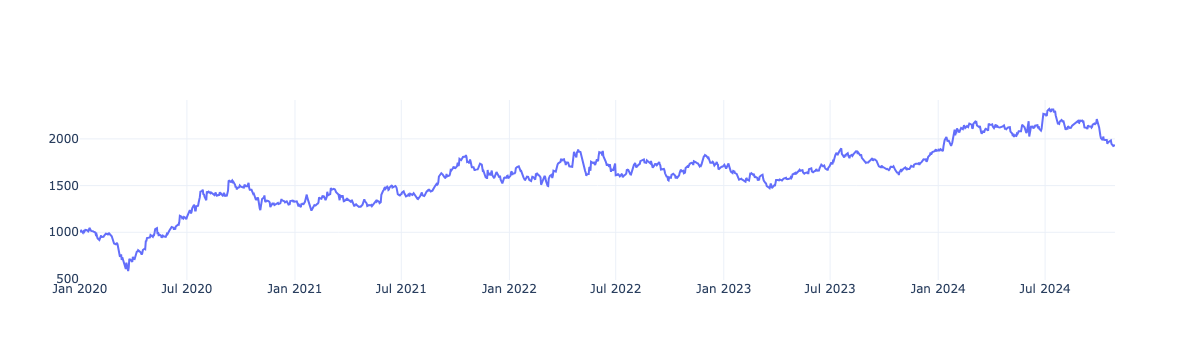

In [232]:
plot_plotly(df.Benchmark_bal)

## Strategy

In [233]:
df['Range'] = df.High - df.Low
df['Distance'] = abs(df.Close - df.Low)
df['Close percentage'] = (df.Distance/df.Range)*100 

In [234]:
df

Price,Close,High,Low,Open,Return,Benchmark_bal,Benchmark_pct,Range,Distance,Close percentage
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,
2020-01-01,690.138306,698.138733,688.263977,693.978516,1.000000,1000.000000,0.000,9.874756,1.874329,18.981012
2020-01-02,701.887512,704.470520,691.235535,691.235535,1.017024,1017.024423,1.702,13.234985,10.651978,80.483486
2020-01-03,702.733276,704.790527,696.264343,700.835999,1.001205,1018.249923,1.825,8.526184,6.468933,75.871375
2020-01-06,686.435303,698.504456,684.835205,694.892883,0.976808,994.634405,-0.537,13.669250,1.600098,11.705819
2020-01-07,696.995850,701.521790,691.921265,694.435669,1.015385,1009.936478,0.994,9.600525,5.074585,52.857370
...,...,...,...,...,...,...,...,...,...,...
2024-10-22,1343.349976,1376.000000,1340.224976,1369.199951,0.981120,1946.493862,94.649,35.775024,3.125000,8.735144
2024-10-23,1338.525024,1357.474976,1335.000000,1337.500000,0.996408,1939.502580,93.950,22.474976,3.525024,15.684219
2024-10-24,1339.800049,1343.699951,1323.125000,1335.275024,1.000953,1941.350071,94.135,20.574951,16.675049,81.045387


### Threshold

In [236]:
# new_df['Long'] = np.where( 
#     (new_df['Close percentage'] < 20) & 
#     (new_df['Range'] > 10), 
#     True, False)
# new_df['Sys_ret'] = np.where(new_df.Long.shift(1) == True, new_df.Return, 1)
# new_df['Sys_bal'] = new_df.Sys_ret.cumprod() * STARTING_BALANCE

In [237]:
def simulate_strategy_for_params(df, close_pct_threshold, range_value):
    _long = np.where(
        (df['Close percentage'] < close_pct_threshold) & 
        (df['Range'] > range_value), 
        True, False)
    
    df_long = pd.DataFrame({'Long': _long}, index=df.index)
    
    df_long['Sys_ret'] = np.where(df_long.Long.shift(1) == True, df.Return, 1)
    df_long['Sys_bal'] = df_long.Sys_ret.cumprod() * STARTING_BALANCE

    # Stats
    prev = False
    trades = 0
    days_in_market = 0
    for l in df_long.Long:
        if l and prev:
            days_in_market += 1
            continue
        if l:
            days_in_market += 1
            trades += 1
        prev = l

    _b_return = df.Benchmark_bal.iloc[-1]
    _s_return = df_long.Sys_bal.iloc[-1]

    stats = {
        'close_pct_threshold': close_pct_threshold,
        'range_value': range_value,
        'Total Days': len(df_long.Long),
        'Market Exposure': round((days_in_market/len(df_long.Long))*100, 2),
        '# of Trades': trades,
        'Benchmark WinRate': calc_win_rate(df.Return),
        'Strategy WinRate': calc_win_rate(df_long.Sys_ret),
        'Benchmark Return (Rs)': round(_b_return, 2),
        'Benchmark Return (%)': round(((_b_return - STARTING_BALANCE)/STARTING_BALANCE)*100, 2),
        'Strategy Return (Rs)': round(_s_return, 2),
        'Strategy Return (%)': round(((_s_return - STARTING_BALANCE)/STARTING_BALANCE)*100, 2),             
    }
    return stats
    
    # return df_long

In [245]:
stats_df = pd.Series()

for v in range(14, 27, 2):
    for p in range(20, 21):
        d = simulate_strategy_for_params(df, close_pct_threshold=p, range_value=v)
        stats_df = pd.concat([stats_df, pd.Series(d, name=d['range_value'])], axis=1)
stats_df.dropna(axis=1)

,14,16,18,20,22,24,26
close_pct_threshold,20.000,20.000,20.000,20.000,20.000,20.000,20.000
range_value,14.000,16.000,18.000,20.000,22.000,24.000,26.000
Total Days,1195.000,1195.000,1195.000,1195.000,1195.000,1195.000,1195.000
Market Exposure,21.260,19.500,17.410,15.310,13.050,10.630,8.870
# of Trades,201.000,184.000,168.000,154.000,135.000,111.000,97.000
Benchmark WinRate,52.178,52.178,52.178,52.178,52.178,52.178,52.178
Strategy WinRate,51.969,51.502,50.481,50.820,50.000,48.819,51.887
Benchmark Return (Rs),1933.450,1933.450,1933.450,1933.450,1933.450,1933.450,1933.450
Benchmark Return (%),93.350,93.350,93.350,93.350,93.350,93.350,93.350
Strategy Return (Rs),1007.250,937.470,915.310,1042.440,1034.100,1046.120,1046.860


In [ ]:
# Best range value
# 4, 5 - 2020
# 1, 2, 3 - 2022
# 4 - 2023
# 4 - 2024

In [ ]:
plot_plotly(s_df.Sys_bal, df.Benchmark_bal)

# Benchmark comparisons

In [94]:
def calc_roi(df_returns_col, capital=1000, start_date=None, end_date=None):
    _col = df_returns_col[start_date:end_date]
    for _return in _col:
        capital = capital * _return
    return capital

In [95]:
def calc_win_rate(df_returns_col, start_date=None, end_date=None):
    _col = df_returns_col[start_date:end_date]
    
    _profit = _col[_col > 1.0].count()
    _loss = _col[_col < 1.0].count()
    
    _win_rate = (_profit/(_profit + _loss))*100
    return _win_rate.round(3)

In [362]:
calc_win_rate(new_df.Return)

51.541

In [363]:
calc_win_rate(new_df.Sys_ret)

56.452

In [364]:
calc_roi(new_df.Return, start_date=dtm.date(2020,1,1))

2029.0281614853618

In [366]:
calc_roi(new_df.Sys_ret, start_date=dtm.date(2020,1,1))

1091.277046747885